In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from warnings import filterwarnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("loan_IIDT.csv")

C:\Users\phili\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 100

In [4]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.drop(['id','member_id'],axis=1,inplace=True)

In [6]:
df.shape

(42542, 109)

In [7]:
## Visualization

<AxesSubplot:xlabel='loan_amnt', ylabel='count'>

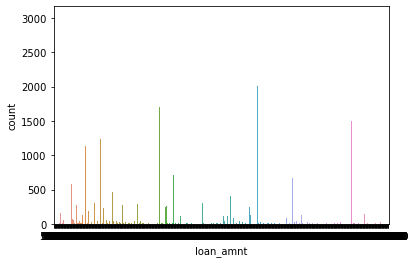

In [8]:
sns.countplot(x="loan_amnt",data=df)

<AxesSubplot:xlabel='term', ylabel='count'>

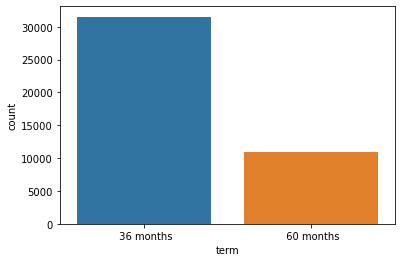

In [9]:
sns.countplot(x="term",data=df)

<AxesSubplot:>

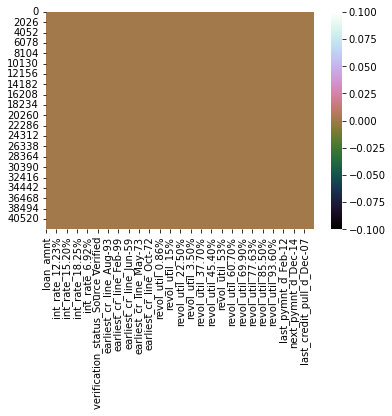

In [166]:
sns.heatmap(df.isnull(), cmap='cubehelix')

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

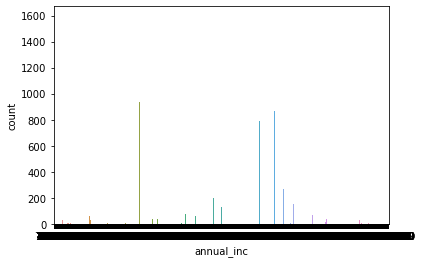

In [167]:
sns.countplot(x="annual_inc",data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

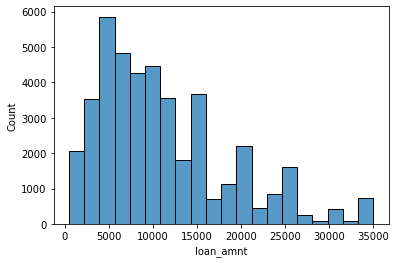

In [169]:
sns.histplot(df['loan_amnt'],kde=False,bins=20)

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

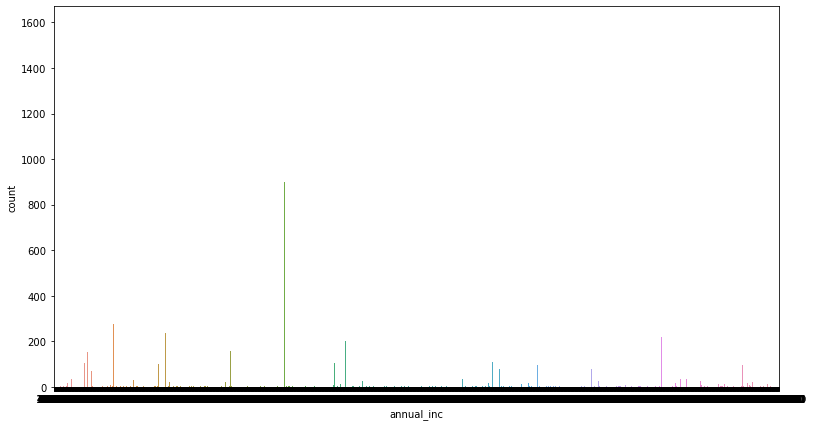

In [170]:
plt.figure(figsize=(13, 7))
sns.countplot(x = df["annual_inc"])

# Removing the missing values ...

In [10]:
df["loan_amnt"]=df["loan_amnt"].replace(to_replace="0",value=np.nan)
df["loan_amnt"]=df["loan_amnt"].astype(float)

In [11]:
median=df["loan_amnt"].median()
median

9700.0

In [12]:
df["loan_amnt"].replace(np.nan,median,inplace=True)

In [13]:
df["funded_amnt"]=df["funded_amnt"].replace(to_replace="0",value=np.nan)
df["funded_amnt"]=df["funded_amnt"].astype(float)

In [14]:
median=df["funded_amnt"].median()
median

9600.0

In [15]:
df["funded_amnt"].replace(np.nan,median,inplace=True)

In [16]:
df["funded_amnt_inv"]=df["funded_amnt_inv"].replace(to_replace="0",value=np.nan)
df["funded_amnt_inv"]=df["funded_amnt_inv"].astype(float)

In [17]:
median=df["funded_amnt_inv"].median()
median

8500.0

In [18]:
df["funded_amnt_inv"].replace(np.nan,median,inplace=True)

In [19]:
mode=df["term"].mode().values[0]
df["term"]=df["term"].replace(np.nan,mode)

In [20]:
mode=df["int_rate"].mode().values[0]
df["int_rate"]=df["int_rate"].replace(np.nan,mode)

In [21]:
df["installment"]=df["installment"].replace(to_replace="0",value=np.nan)
df["installment"]=df["installment"].astype(float)

In [22]:
median=df["installment"].median()
median

277.69

In [23]:
df["installment"].replace(np.nan,median,inplace=True)

In [24]:
mode=df["grade"].mode().values[0]
df["grade"]=df["grade"].replace(np.nan,mode)

In [25]:
mode=df["sub_grade"].mode().values[0]
df["sub_grade"]=df["sub_grade"].replace(np.nan,mode)

In [26]:
mode=df["emp_title"].mode().values[0]
df["emp_title"]=df["emp_title"].replace(np.nan,mode)

In [27]:
mode=df["emp_length"].mode().values[0]
df["emp_length"]=df["emp_length"].replace(np.nan,mode)

In [28]:
mode=df["home_ownership"].mode().values[0]
df["home_ownership"]=df["home_ownership"].replace(np.nan,mode)

In [29]:
df["annual_inc"]=df["annual_inc"].replace(to_replace="0",value=np.nan)
df["annual_inc"]=df["annual_inc"].astype(float)

In [30]:
median=df["annual_inc"].median()
median

59000.0

In [31]:
df["annual_inc"].replace(np.nan,median,inplace=True)

In [32]:
mode=df["verification_status"].mode().values[0]
df["verification_status"]=df["verification_status"].replace(np.nan,mode)

In [33]:
mode=df["issue_d"].mode().values[0]
df["issue_d"]=df["issue_d"].replace(np.nan,mode)

In [34]:
mode=df["loan_status"].mode().values[0]
df["loan_status"]=df["loan_status"].replace(np.nan,mode)

In [35]:
mode=df["pymnt_plan"].mode().values[0]
df["pymnt_plan"]=df["pymnt_plan"].replace(np.nan,mode)

In [36]:
mode=df["url"].mode().values[0]
df["url"]=df["url"].replace(np.nan,mode)

In [37]:
mode=df["desc"].mode().values[0]
df["desc"]=df["desc"].replace(np.nan,mode)

In [38]:
mode=df["purpose"].mode().values[0]
df["purpose"]=df["purpose"].replace(np.nan,mode)

In [39]:
mode=df["title"].mode().values[0]
df["title"]=df["title"].replace(np.nan,mode)

In [40]:
mode=df["zip_code"].mode().values[0]
df["zip_code"]=df["zip_code"].replace(np.nan,mode)

In [41]:
mode=df["addr_state"].mode().values[0]
df["addr_state"]=df["addr_state"].replace(np.nan,mode)

In [42]:
df["dti"]=df["dti"].replace(to_replace="0",value=np.nan)
df["dti"]=df["dti"].astype(float)

In [43]:
median=df["dti"].median()
median

13.47

In [44]:
df["dti"].replace(np.nan,median,inplace=True)

In [45]:
df["delinq_2yrs"]=df["delinq_2yrs"].replace(to_replace="0",value=np.nan)
df["delinq_2yrs"]=df["delinq_2yrs"].astype(float)

In [46]:
median=df["delinq_2yrs"].median()
median

0.0

In [47]:
df["delinq_2yrs"].replace(np.nan,median,inplace=True)

In [48]:
mode=df["earliest_cr_line"].mode().values[0]
df["earliest_cr_line"]=df["earliest_cr_line"].replace(np.nan,mode)

In [49]:
df["inq_last_6mths"]=df["inq_last_6mths"].replace(to_replace="0",value=np.nan)
df["inq_last_6mths"]=df["inq_last_6mths"].astype(float)

In [50]:
median=df["inq_last_6mths"].median()
median

1.0

In [51]:
df["inq_last_6mths"].replace(np.nan,median,inplace=True)

In [52]:
df["mths_since_last_delinq"]=df["mths_since_last_delinq"].replace(to_replace="0",value=np.nan)
df["mths_since_last_delinq"]=df["mths_since_last_delinq"].astype(float)

In [53]:
median=df["mths_since_last_delinq"].median()
median

33.0

In [54]:
df["mths_since_last_delinq"].replace(np.nan,median,inplace=True)

In [55]:
df["mths_since_last_record"]=df["mths_since_last_record"].replace(to_replace="0",value=np.nan)
df["mths_since_last_record"]=df["mths_since_last_record"].astype(float)

In [56]:
median=df["mths_since_last_record"].median()
median

85.0

In [57]:
df["mths_since_last_record"].replace(np.nan,median,inplace=True)

In [58]:
df["open_acc"]=df["open_acc"].replace(to_replace="0",value=np.nan)
df["open_acc"]=df["open_acc"].astype(float)

In [59]:
median=df["open_acc"].median()
median

9.0

In [60]:
df["open_acc"].replace(np.nan,median,inplace=True)

In [61]:
df["pub_rec"]=df["pub_rec"].replace(to_replace="0",value=np.nan)
df["pub_rec"]=df["pub_rec"].astype(float)

In [62]:
median=df["pub_rec"].median()
median

0.0

In [63]:
df["pub_rec"].replace(np.nan,median,inplace=True)

In [64]:
df["revol_bal"]=df["revol_bal"].replace(to_replace="0",value=np.nan)
df["revol_bal"]=df["revol_bal"].astype(float)

In [65]:
median=df["revol_bal"].median()
median

8821.0

In [66]:
df["revol_bal"].replace(np.nan,median,inplace=True)

In [67]:
mode=df["revol_util"].mode().values[0]
df["revol_util"]=df["revol_util"].replace(np.nan,mode)

In [68]:
mode=df["initial_list_status"].mode().values[0]
df["initial_list_status"]=df["initial_list_status"].replace(np.nan,mode)

In [69]:
df["total_acc"]=df["total_acc"].replace(to_replace="0",value=np.nan)
df["total_acc"]=df["total_acc"].astype(float)

In [70]:
median=df["total_acc"].median()
median

20.0

In [71]:
df["total_acc"].replace(np.nan,median,inplace=True)

In [72]:
df["out_prncp"]=df["out_prncp"].replace(to_replace="0",value=np.nan)
df["out_prncp"]=df["out_prncp"].astype(float)

In [73]:
median=df["out_prncp"].median()
median

0.0

In [74]:
df["out_prncp"].replace(np.nan,median,inplace=True)

In [75]:
df["out_prncp_inv"]=df["out_prncp_inv"].replace(to_replace="0",value=np.nan)
df["out_prncp_inv"]=df["out_prncp_inv"].astype(float)

In [76]:
median=df["out_prncp_inv"].median()
median

0.0

In [77]:
df["out_prncp_inv"].replace(np.nan,median,inplace=True)

In [78]:
df["total_pymnt"]=df["total_pymnt"].replace(to_replace="0",value=np.nan)
df["total_pymnt"]=df["total_pymnt"].astype(float)

In [79]:
median=df["total_pymnt"].median()
median

9673.221341

In [80]:
df["total_pymnt"].replace(np.nan,median,inplace=True)

In [81]:
df["total_pymnt_inv"]=df["total_pymnt_inv"].replace(to_replace="0",value=np.nan)
df["total_pymnt_inv"]=df["total_pymnt_inv"].astype(float)

In [82]:
median=df["total_pymnt_inv"].median()
median

8947.29

In [83]:
df["total_pymnt_inv"].replace(np.nan,median,inplace=True)

In [84]:
df["total_rec_prncp"]=df["total_rec_prncp"].replace(to_replace="0",value=np.nan)
df["total_rec_prncp"]=df["total_rec_prncp"].astype(float)

In [85]:
median=df["total_rec_prncp"].median()
median

8000.0

In [86]:
df["total_rec_prncp"].replace(np.nan,median,inplace=True)

In [87]:
df["total_rec_int"]=df["total_rec_int"].replace(to_replace="0",value=np.nan)
df["total_rec_int"]=df["total_rec_int"].astype(float)

In [88]:
median=df["total_rec_int"].median()
median

1339.14

In [89]:
df["total_rec_int"].replace(np.nan,median,inplace=True)

In [90]:
df["total_rec_late_fee"]=df["total_rec_late_fee"].replace(to_replace="0",value=np.nan)
df["total_rec_late_fee"]=df["total_rec_late_fee"].astype(float)

In [91]:
median=df["total_rec_late_fee"].median()
median

0.0

In [92]:
df["total_rec_late_fee"].replace(np.nan,median,inplace=True)

In [93]:
df["recoveries"]=df["recoveries"].replace(to_replace="0",value=np.nan)
df["recoveries"]=df["recoveries"].astype(float)

In [94]:
median=df["recoveries"].median()
median

0.0

In [95]:
df["recoveries"].replace(np.nan,median,inplace=True)

In [96]:
df["collection_recovery_fee"]=df["collection_recovery_fee"].replace(to_replace="0",value=np.nan)
df["collection_recovery_fee"]=df["collection_recovery_fee"].astype(float)

In [97]:
median=df["collection_recovery_fee"].median()
median

0.0

In [98]:
df["collection_recovery_fee"].replace(np.nan,median,inplace=True)

In [99]:
mode=df["last_pymnt_d"].mode().values[0]
df["last_pymnt_d"]=df["last_pymnt_d"].replace(np.nan,mode)

In [100]:
mode=df["next_pymnt_d"].mode().values[0]
df["next_pymnt_d"]=df["next_pymnt_d"].replace(np.nan,mode)

In [101]:
mode=df["last_credit_pull_d"].mode().values[0]
df["last_credit_pull_d"]=df["last_credit_pull_d"].replace(np.nan,mode)

In [102]:
mode=df["application_type"].mode().values[0]
df["application_type"]=df["application_type"].replace(np.nan,mode)

In [103]:
df["last_pymnt_amnt"]=df["last_pymnt_amnt"].replace(to_replace="0",value=np.nan)
df["last_pymnt_amnt"]=df["last_pymnt_amnt"].astype(float)

In [104]:
median=df["last_pymnt_amnt"].median()
median

525.59

In [105]:
df["last_pymnt_amnt"].replace(np.nan,median,inplace=True)

In [106]:
df["collections_12_mths_ex_med"]=df["collections_12_mths_ex_med"].replace(to_replace="0",value=np.nan)
df["collections_12_mths_ex_med"]=df["collections_12_mths_ex_med"].astype(float)

In [107]:
median=df["collections_12_mths_ex_med"].median()
median

0.0

In [108]:
df["collections_12_mths_ex_med"].replace(np.nan,median,inplace=True)

In [109]:
df["mths_since_last_major_derog"]=df["mths_since_last_major_derog"].replace(to_replace="0",value=np.nan)
df["mths_since_last_major_derog"]=df["mths_since_last_major_derog"].astype(float)

In [110]:
median=df["mths_since_last_major_derog"].median()
median

nan

In [111]:
df["mths_since_last_major_derog"].replace(np.nan,median,inplace=True)

In [112]:
df["policy_code"]=df["policy_code"].replace(to_replace="0",value=np.nan)
df["policy_code"]=df["policy_code"].astype(float)

In [113]:
median=df["policy_code"].median()
median

1.0

In [114]:
df["policy_code"].replace(np.nan,median,inplace=True)

In [115]:
df["annual_inc_joint"]=df["annual_inc_joint"].replace(to_replace="0",value=np.nan)
df["annual_inc_joint"]=df["annual_inc_joint"].astype(float)

In [116]:
mean=df["annual_inc_joint"].mean()
mean

nan

In [117]:
df["annual_inc_joint"].replace(np.nan,mean,inplace=True)

In [118]:
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].replace(to_replace="0",value=np.nan)
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].astype(float)

In [119]:
median=df["pub_rec_bankruptcies"].median()
median

0.0

In [120]:
df["pub_rec_bankruptcies"].replace(np.nan,median,inplace=True)

In [121]:
df["tax_liens"]=df["tax_liens"].replace(to_replace="0",value=np.nan)
df["tax_liens"]=df["tax_liens"].astype(float)

In [122]:
median=df["tax_liens"].median()
median

0.0

In [123]:
df["tax_liens"].replace(np.nan,median,inplace=True)

In [124]:
df["acc_now_delinq"]=df["acc_now_delinq"].replace(to_replace="0",value=np.nan)
df["tacc_now_delinq"]=df["acc_now_delinq"].astype(float)

In [125]:
median=df["acc_now_delinq"].median()
median

0.0

In [126]:
df["acc_now_delinq"].replace(np.nan,median,inplace=True)

In [127]:
df["chargeoff_within_12_mths"]=df["chargeoff_within_12_mths"].replace(to_replace="0",value=np.nan)
df["chargeoff_within_12_mths"]=df["chargeoff_within_12_mths"].astype(float)

In [128]:
median=df["chargeoff_within_12_mths"].median()
median

0.0

In [129]:
df["chargeoff_within_12_mths"].replace(np.nan,median,inplace=True)

In [130]:
df["delinq_amnt"]=df["delinq_amnt"].replace(to_replace="0",value=np.nan)
df["delinq_amnt"]=df["delinq_amnt"].astype(float)

In [131]:
median=df["delinq_amnt"].median()
median

0.0

In [132]:
df["delinq_amnt"].replace(np.nan,median,inplace=True)

In [133]:
df.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_rev_tl','num_actv_bc_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'],axis=1,inplace=True)

In [134]:
df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,tacc_now_delinq
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,33.0,85.0,3.0,0.0,13648.0,83.70%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,Jun-16,May-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,33.0,85.0,3.0,0.0,1687.0,9.40%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Jun-16,Sep-13,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,33.0,85.0,2.0,0.0,2956.0,98.50%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,Jun-16,May-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,85.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Jun-16,Apr-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,85.0,15.0,0.0,27783.0,53.90%,38.0,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.0
5,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,33.0,85.0,9.0,0.0,7963.0,28.30%,12.0,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jun-16,Jan-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.0
6,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-05,1.0,33.0,85.0,7.0,0.0,17726.0,85.60%,11.0,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,Jun-16,May-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,0.0
7,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Ca

In [135]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_l

In [136]:
dummies=pd.get_dummies(df[["term","int_rate","grade","sub_grade","home_ownership","verification_status","pymnt_plan","purpose","earliest_cr_line","revol_util","initial_list_status","last_pymnt_d","next_pymnt_d","last_credit_pull_d","application_type"]],
columns=["term","int_rate","grade","sub_grade","home_ownership","verification_status","pymnt_plan","purpose","earliest_cr_line","revol_util","initial_list_status","last_pymnt_d","next_pymnt_d","last_credit_pull_d","application_type"],drop_first=True)

In [137]:
columns=["term","int_rate","grade","sub_grade","home_ownership","verification_status","pymnt_plan","purpose","earliest_cr_line","revol_util","initial_list_status","last_pymnt_d","next_pymnt_d","last_credit_pull_d","application_type"]
df=pd.concat([df,dummies],axis=1)
df.drop(columns,axis=1,inplace=True)

In [138]:
df.shape

(42542, 2449)

In [139]:
df.head(10)

loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0     5000.0       5000.0           4975.0       162.87   
1     2500.0       2500.0           2500.0        59.83   
2     2400.0       2400.0           2400.0        84.33   
3    10000.0      10000.0          10000.0       339.31   
4     3000.0       3000.0           3000.0        67.79   
5     5000.0       5000.0           5000.0       156.46   
6     7000.0       7000.0           7000.0       170.08   
7     3000.0       3000.0           3000.0       109.43   
8     5600.0       5600.0           5600.0       152.39   
9     5375.0       5375.0           5350.0       121.45   

                   emp_title emp_length  annual_inc issue_d  loan_status  \
0                    US Army  10+ years     24000.0  Dec-11   Fully Paid   
1                      Ryder   < 1 year     30000.0  Dec-11  Charged Off   
2                    US Army  10+ years     12252.0  Dec-11   Fully Paid   
3        AIR RESOURCES BOARD  10+ years     49200.0  Dec-11   Fully Paid   
4   University Medical Group     1 year     80000.0  Dec-11      Current   
5       Veolia Transportaton    3 years     36000.0  Dec-11   Fully Paid   
6  Southern Star Photography    8 years     47004.0  Dec-11   Fully Paid   
7            MKC Accounting     9 years     48000.0  Dec-11   Fully Paid   
8                    US Army    4 years     40000.0  Dec-11  Charged Off   
9                  Starbucks   < 1 year     15000.0  Dec-11  Charged Off   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
4  https://lendingclub.com/browse/loanDetail.acti...   
5  https://lendingclub.com/browse/loanDetail.acti...   
6  https://lendingclub.com/browse/loanDetail.acti...   
7  https://lendingclub.com/browse/loanDetail.acti...   
8  https://lendingclub.com/browse/loanDetail.acti...   
9  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc  \
0    Borrower added on 12/22/11 > I need to upgra...   
1    Borrower added on 12/22/11 > I plan to use t...   
2                                                      
3    Borrower added on 12/21/11 > to pay for prop...   
4    Borrower added on 12/21/11 > I plan on combi...   
5                                                      
6    Borrower added on 12/18/11 > I am planning o...   
7    Borrower added on 12/16/11 > Downpayment for...   
8    Borrower added on 12/21/11 > I own a small h...   
9    Borrower added on 12/16/11 > I'm trying to b...   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
4                               Personal    972xx         OR  17.94   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   
6                                   Loan    280xx         NC  23.51   
7                        Car Downpayment    900xx         CA   5.35   
8   Expand Business & Buy Debt Portfolio    958xx         CA   5.55   
9            Building my credit history.    774xx         TX  18.08   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0          0.0             1.0                    33.0   
1          0.0             5.0                    33.0   
2          0.0             2.0                    33.0   
3          0.0             1.0                    35.0   
4          0.0             0.0                    38.0   
5          0.0             3.0                    33.0   
6          0.0             1.0                    33.0   
7          0.0             2.0      

## Dropping the columns 

In [140]:
df.drop(['emp_title','emp_length','issue_d','url','desc','title','zip_code','addr_state','tacc_now_delinq'],axis=1,inplace=True)

# Logistic regression

In [141]:
x=df.drop(['loan_status'],axis=1)
y=df[['loan_status']]

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.11,test_size=0.1,random_state=5)

In [143]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\phili\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
reg.score(x_train,y_train)

0.9249839709339602

In [145]:
reg.score(x_test,y_test)

0.9193889541715629

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [147]:
xscaled=x.apply(zscore) # convert all attributes
xscaled.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  4.254200e+04  4.254200e+04     4.254200e+04  4.254200e+04   
mean   5.002835e-15 -1.986737e-15    -4.725289e-15 -5.228999e-16   
std    1.000012e+00  1.000012e+00     1.000012e+00  1.000012e+00   
min   -1.429031e+00 -1.444306e+00    -1.421890e+00 -1.469284e+00   
25%   -7.947753e-01 -8.146058e-01    -7.277418e-01 -7.518400e-01   
50%   -1.875094e-01 -1.709124e-01    -2.299187e-01 -2.150496e-01   
75%    5.277149e-01  5.847276e-01     5.413566e-01  5.043447e-01   
max    3.226674e+00  3.383394e+00     3.486226e+00  4.703375e+00   

         annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  4.254200e+04  4.254200e+04  4.254200e+04    4.254200e+04   
mean  -1.217391e-16 -3.191552e-16 -9.804072e-15    6.462825e-14   
std    1.000012e+00  1.000012e+00  1.000012e+00    1.000012e+00   
min   -1.049158e+00 -1.988357e+00 -2.973823e-01   -7.082528e-01   
25%   -4.545961e-01 -7.691501e-01 -2.973823e-01   -7.082528e-01   
50%   -1.581265e-01  1.441354e-02 -2.973823e-01   -5.328485e-02   
75%    2.075453e-01  7.890561e-01 -2.973823e-01    6.016831e-01   
max    9.254323e+01  2.470670e+00  2.508319e+01    2.090569e+01   

       mths_since_last_delinq  mths_since_last_record      open_acc  \
count            4.254200e+04            4.254200e+04  4.254200e+04   
mean             2.046584e-14            1.269929e-13 -3.549395e-16   
std              1.000012e+00            1.000012e+00  1.000012e+00   
min             -2.478381e+00           -5.310321e+00 -1.856486e+00   
25%             -5.437704e-02            1.421676e-01 -7.439732e-01   
50%             -5.437704e-02            1.421676e-01 -7.646533e-02   
75%             -5.437704e-02            1.421676e-01  5.910425e-01   
max              6.336180e+00            2.964632e+00  8.378634e+00   

            pub_rec     revol_bal     total_acc     out_prncp  out_prncp_inv  \
count  4.254200e+04  4.254200e+04  4.254200e+04  4.254200e+04   4.254200e+04   
mean  -1.575084e-15 -1.324428e-17 -1.136282e-15  4.635562e-14   5.788933e-14   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   1.000012e+00   
min   -2.365815e-01 -6.493753e-01 -1.822811e+00 -1.347821e-01  -1.346220e-01   
25%   -2.365815e-01 -4.842263e-01 -7.872506e-01 -1.347821e-01  -1.346220e-01   
50%   -2.365815e-01 -2.487209e-01 -1.831740e-01 -1.347821e-01  -1.346220e-01   
75%   -2.365815e-01  1.341173e-01  5.934960e-01 -1.347821e-01  -1.346220e-01   
max    2.012072e+01  5.418949e+01  5.857592e+00  2.212242e+01   2.218762e+01   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  4.254200e+04     4.254200e+04     4.254200e+04   4.254200e+04   
mean   1.040826e-15     7.047993e-16     3.601795e-15  -2.612999e-16   
std    1.000012e+00     1.000012e+00     1.000012e+00   1.000012e+00   
min   -1.330809e+00    -1.260432e+00    -1.368450e+00  -8.681244e-01   
25%   -7.234967e-01    -7.240360e-01    -7.429665e-01  -6.131371e-01   
50%   -2.548813e-01    -2.586974e-01    -2.312072e-01  -3.485331e-01   
75%    4.905067e-01     4.721454e-01     5.115546e-01   2.193454e-01   
max    5.183077e+00     5.296331e+00     3.606990e+00   8.274673e+00   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        4.254200e+04  4.254200e+04             4.254200e+04   
mean        -3.477347e-15 -1.040252e-14            -7.927938e-15   
std          1.000012e+00  1.000012e+00             1.000012e+00   
min         -1.935002e-01 -1.393355e-01            -8.685249e-02   
25%         -1.935002e-01 -1.393355e-01            -8.685249e-02   
50%         -1.935002e-01 -1.393355e-01            -8.685249e-02   
75%         -1.935002e-01 -1.393355e-01            -8.685249e-02   
max          2.666081e+01  4.141015e+01             4.403555e+01   

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count     4.254200e+04                         0.0          0.0   
mean     -2.140406e-16              

In [148]:
x_train , x_test, y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [149]:
NNH =KNeighborsClassifier(n_neighbors=11)
NNH.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [150]:
predicted_label=NNH.predict(x_test)


In [151]:
NNH.score(x_train,y_train)

0.8771617582860405

In [152]:
NNH.score(x_test,y_test)

0.8744025699287001

In [153]:
# create the model
from sklearn.naive_bayes import GaussianNB
a_model=GaussianNB()
a_model.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [154]:
a_model.score(x_train,y_train)

0.8825010913731153

In [155]:
a_model.score(x_test,y_test)

0.8848233174018648

In [156]:
from xgboost import  XGBClassifier

In [157]:
a = XGBClassifier(n_estimators=5,max_depth=11)

In [158]:
a.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=11, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [159]:
a.score(x_train,y_train)

0.9960710567849828

In [160]:
a.score(x_test,y_test)

0.993340123795346

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
a= DecisionTreeClassifier()

In [163]:
a.fit(x_train,y_train)

DecisionTreeClassifier()

In [164]:
a.score(x_train,y_train)

1.0

In [165]:
a.score(x_train,y_train)

1.0

### Hence all models performance is well but decision tree test and train score is 1. therefore decision tree model is perfect for this loan data set..